#### Import all the packages

In [95]:
# Operational
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For date conversions 
from datetime import datetime
from datetime import date
from datetime import timedelta

# Packages for Ordinary Least Square(OLS), Multiple Linear Regression(MLR) and confusion matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [96]:
# Import the data
df0 = pd.read_csv("2017_Yellow_Taxi_Trip_Data.csv")

#### Explore the data

In [97]:
# Lets keep 'df0' as the original dataset and make a copy (df) where changes will go
df = df0.copy()

# Display the dataset's shape
print(df.shape)

# Display basic infor about the dataset
print(df.info())

(22699, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  flo

#### Check for missing and duplicated values

In [98]:
# Check for duplicates
print('Shape of dataframe:', df.shape)
print('Shape of dataframe with duplicates dropped:', df.drop_duplicates().shape)

# Check for missing values in dataframe
print('Total count of missing values:', df.isna().sum().sum())

# Display missing values per column in dataframe
print('Missing values per column:')
df.isna().sum()

Shape of dataframe: (22699, 18)
Shape of dataframe with duplicates dropped: (22699, 18)
Total count of missing values: 0
Missing values per column:


Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [99]:
# Display descriptive stats about the data
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


**Note:** Some things stand out from this table of summary statistics. For instance, there are clearly some outliers in several variables, like `tip_amount` (\$200) and `total_amount` (\$1,200). Also, a number of the variables, such as `mta_tax`, seem to be almost constant throughout the data, which would imply that they would not be expected to be very predictive.

#### Convert pickup & dropoff columns to datetime

In [100]:
# Checking the format of the data
df['tpep_dropoff_datetime'][0]

'03/25/2017 9:09:47 AM'

In [101]:
# Convert `tpep_pickup_datetime` and `tpep_dropoff_datetime` to datetime format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], format= '%m/%d/%Y %I:%M:%S %p')
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'], format= '%m/%d/%Y %I:%M:%S %p')

print('Data type of tpep_pickup_datetime:', df['tpep_pickup_datetime'].dtype)
print('Data type of tpep_dropoff_datetime:', df['tpep_dropoff_datetime'].dtype)

df.head(3)

Data type of tpep_pickup_datetime: datetime64[ns]
Data type of tpep_dropoff_datetime: datetime64[ns]


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75


#### Create duration column

In [102]:
df['duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime'])/np.timedelta64(1,'m')

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

#### Boxplots

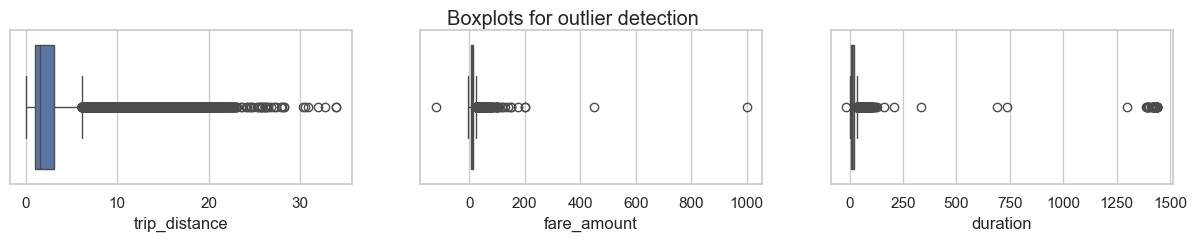

In [104]:
fig, axes = plt.subplots(1,3, figsize =(15,2))
fig.suptitle('Boxplots for outlier detection')
sns.boxplot(ax = axes[0], x=df['trip_distance'])
sns.boxplot(ax = axes[1], x=df['fare_amount'])
sns.boxplot(ax = axes[2], x=df['duration'])
plt.show()

**Note:** 
1. All the variables contain outliers
2. The outliers for the trip_distance might be okay
3. But the latter two does not make any sense to have a 1000 dollars fare amount or have more than 8 hours of trip duration

In [105]:
sum(df['trip_distance'] == 0)

148

**Note:** trip_distance == 0 could mean that a passenger called for a ride but later they changed their mind. 148 out of 23000 rides are insignificant. It's highly unlikely to have an effect on the model. Therefore we leave it untouched.

In [106]:
df['fare_amount'].describe()

count    22699.000000
mean        13.026629
std         13.243791
min       -120.000000
25%          6.500000
50%          9.500000
75%         14.500000
max        999.990000
Name: fare_amount, dtype: float64

**Note:**

The range of values in the `fare_amount` column is large and the extremes don't make much sense.

* **Low values:** Negative values are problematic. Values of zero could be legitimate if the taxi logged a trip that was immediately canceled.

* **High values:** The maximum fare amount in this dataset is nearly $1,000, which seems very unlikely. We can use interquartile range to cap the high values. For this we can use a iqr factor of 6

In [107]:
def outlier_imputer(column_list,iqr_factor):
    for col in column_list:
        # If the values are negative it changes to zero
        df.loc[df[col] < 0, col] = 0

        # Calculating the 25th and the 75th quantile
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)

        #The interquartile formula
        iqr = q3-q1

        upper_threshold = q3 + (iqr_factor * iqr)
        print(col)
        print('q3',q3)
        print('Upper threshold', upper_threshold)

        # reassign all the extreme top values with the upper threshold

        df.loc[df[col] > upper_threshold, col] = upper_threshold
        print(df[col].describe())

In [108]:
outlier_imputer(['fare_amount'], 6)

fare_amount
q3 14.5
Upper threshold 62.5
count    22699.000000
mean        12.897913
std         10.541137
min          0.000000
25%          6.500000
50%          9.500000
75%         14.500000
max         62.500000
Name: fare_amount, dtype: float64


In [109]:
outlier_imputer(['duration'], 6)

duration
q3 18.383333333333333
Upper threshold 88.78333333333333
count    22699.000000
mean        14.460555
std         11.947043
min          0.000000
25%          6.650000
50%         11.183333
75%         18.383333
max         88.783333
Name: duration, dtype: float64


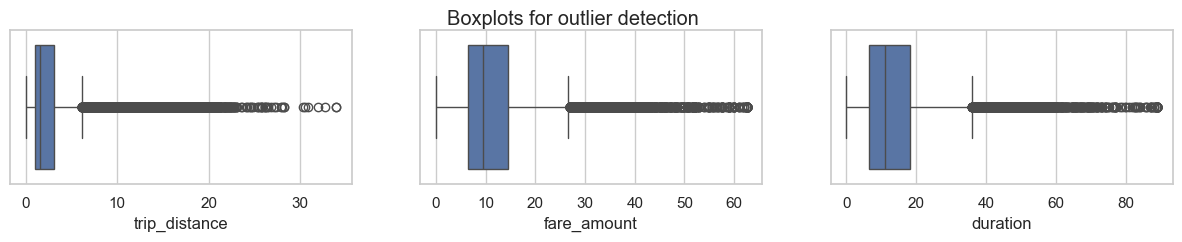

In [110]:
fig, axes = plt.subplots(1,3, figsize =(15,2))
fig.suptitle('Boxplots for outlier detection')
sns.boxplot(ax = axes[0], x=df['trip_distance'])
sns.boxplot(ax = axes[1], x=df['fare_amount'])
sns.boxplot(ax = axes[2], x=df['duration'])
plt.show()

**Note:** Now there are no extreme outliers in these variables.

#### Feature engineering

When deployed, the model will not know the duration of a trip until after the trip occurs, so we cannot train a model that uses this feature. However, we can use the statistics of trips we do know to generalize about ones we do not know.

In [112]:
# Lets create a `pickup_dropoff` column
df['pickup_dropoff'] = df['PULocationID'].astype(str) + ' ' + df['DOLocationID'].astype(str)
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.066667,100 231
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.500000,186 43
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.200000,262 236
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,188 97
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,16.716667,4 112


In [113]:
# We group by the pickup_dropoff and get the mean trip_distance
grouped = df.groupby(['pickup_dropoff']).mean(numeric_only=True)[['trip_distance']]
grouped.head()

,trip_distance
pickup_dropoff,
1 1,2.433333
10 148,15.700000
100 1,16.890000
100 100,0.253333
100 107,1.180000


In [114]:
# Creating a mean_distance column 
# Converting grouped dataset to a dictionary
grouped_dict = grouped.to_dict()
grouped_dict = grouped_dict['trip_distance']

# We create a mean_distance and assign values of pickup_dropoff to the column
df['mean_distance'] = df['pickup_dropoff']
# We use the map() as a replace()
df['mean_distance'] = df['mean_distance'].map(grouped_dict)
#result
df[['pickup_dropoff', 'mean_distance']].head()

,pickup_dropoff,mean_distance
0,100 231,3.521667
1,186 43,3.108889
2,262 236,0.881429
3,188 97,3.700000
4,4 112,4.435000


In [115]:
# Creating a mean_duration column

grouped = df.groupby(['pickup_dropoff']).mean(numeric_only=True)[['duration']]

# Converting grouped dataset to a dictionary
grouped_dict = grouped.to_dict()
grouped_dict = grouped_dict['duration']

# We create a mean_distance and assign values of pickup_dropoff to the column
df['mean_duration'] = df['pickup_dropoff']
# We use the map() as a replace()
df['mean_duration'] = df['mean_duration'].map(grouped_dict)
#result
df[['pickup_dropoff', 'mean_duration']].head()

,pickup_dropoff,mean_duration
0,100 231,22.847222
1,186 43,24.470370
2,262 236,7.250000
3,188 97,30.250000
4,4 112,14.616667


#### Lets create `day` and `month` columns

In [117]:
df['day'] = df['tpep_pickup_datetime'].dt.day_name().str.lower()
df['month'] = df['tpep_pickup_datetime'].dt.strftime('%b').str.lower()
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,2.76,0.0,0.3,16.56,14.066667,100 231,3.521667,22.847222,saturday,mar
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,4.00,0.0,0.3,20.80,26.500000,186 43,3.108889,24.470370,tuesday,apr
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,1.45,0.0,0.3,8.75,7.200000,262 236,0.881429,7.250000,friday,dec
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,6.39,0.0,0.3,27.69,30.250000,188 97,3.700000,30.250000,sunday,may
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,0.00,0.0,0.3,17.80,16.716667,4 112,4.435000,14.616667,saturday,apr


#### Create rush_hour column

In [118]:
# Create rush_hour column
df['rush_hour'] = df['tpep_pickup_datetime'].dt.hour.astype(int)

#IF day is saturday or sunday, impute 0 in 'rush_hour' column
df.loc[df['day'].isin(['saturday','sunday']),'rush_hour'] = 0
df[['tpep_pickup_datetime', 'day', 'rush_hour']].head(10)

,tpep_pickup_datetime,day,rush_hour
0,2017-03-25 08:55:43,saturday,0
1,2017-04-11 14:53:28,tuesday,14
2,2017-12-15 07:26:56,friday,7
3,2017-05-07 13:17:59,sunday,0
4,2017-04-15 23:32:20,saturday,0
5,2017-03-25 20:34:11,saturday,0
6,2017-05-03 19:04:09,wednesday,19
7,2017-08-15 17:41:06,tuesday,17
8,2017-02-04 16:17:07,saturday,0
9,2017-11-10 15:20:29,friday,15


In [119]:
def rush_hourizer(hour):
    if 6 <= hour['rush_hour'] < 10:
        val = 1
    elif 16 <= hour['rush_hour'] < 20:
        val = 1
    else:
        val = 0

    return val

In [120]:
# Apply the rush_hourizer() function to the new column
df.loc[(df['day'] != 'saturday') & (df['day'] != 'sunday') , 'rush_hour'] = df.apply(rush_hourizer, axis = 1)

In [121]:
#Lets see how our data looks
df[['tpep_pickup_datetime', 'day', 'rush_hour']].head(10)

,tpep_pickup_datetime,day,rush_hour
0,2017-03-25 08:55:43,saturday,0
1,2017-04-11 14:53:28,tuesday,0
2,2017-12-15 07:26:56,friday,1
3,2017-05-07 13:17:59,sunday,0
4,2017-04-15 23:32:20,saturday,0
5,2017-03-25 20:34:11,saturday,0
6,2017-05-03 19:04:09,wednesday,1
7,2017-08-15 17:41:06,tuesday,1
8,2017-02-04 16:17:07,saturday,0
9,2017-11-10 15:20:29,friday,0


#### Scatter plot

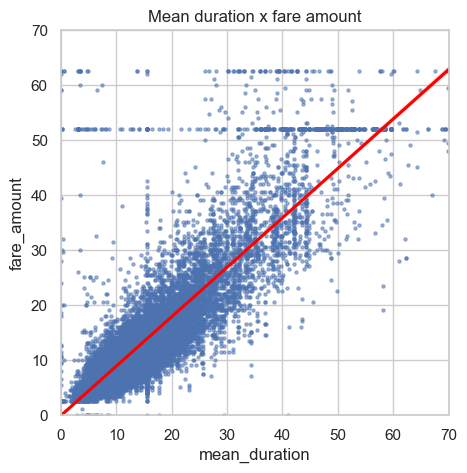

In [122]:
sns.set(style='whitegrid')
f = plt.figure()
f.set_figwidth(5)
f.set_figheight(5)

sns.regplot(x = df['mean_duration'], y = df['fare_amount'], scatter_kws={'alpha':0.5,'s':5}, line_kws={'color':'red'})
plt.ylim(0,70)
plt.xlim(0,70)
plt.title('Mean duration x fare amount')
plt.show()

**Note:** There is a correlation between fare_amount and mean_duration.

#### Isolate modeling variables

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

In [124]:
# Since we do not need so many columns to train a model and it could have a negative effect the fitting of the model. we are going to drop e few columns

df2 = df.copy()

df2 = df2.drop(['Unnamed: 0', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'tpep_dropoff_datetime', 'tpep_pickup_datetime', 'duration', 'pickup_dropoff', 'day', 'month'], axis=1)

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22699 non-null  int64  
 1   passenger_count  22699 non-null  int64  
 2   fare_amount      22699 non-null  float64
 3   mean_distance    22699 non-null  float64
 4   mean_duration    22699 non-null  float64
 5   rush_hour        22699 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.0 MB


#### Pairplot

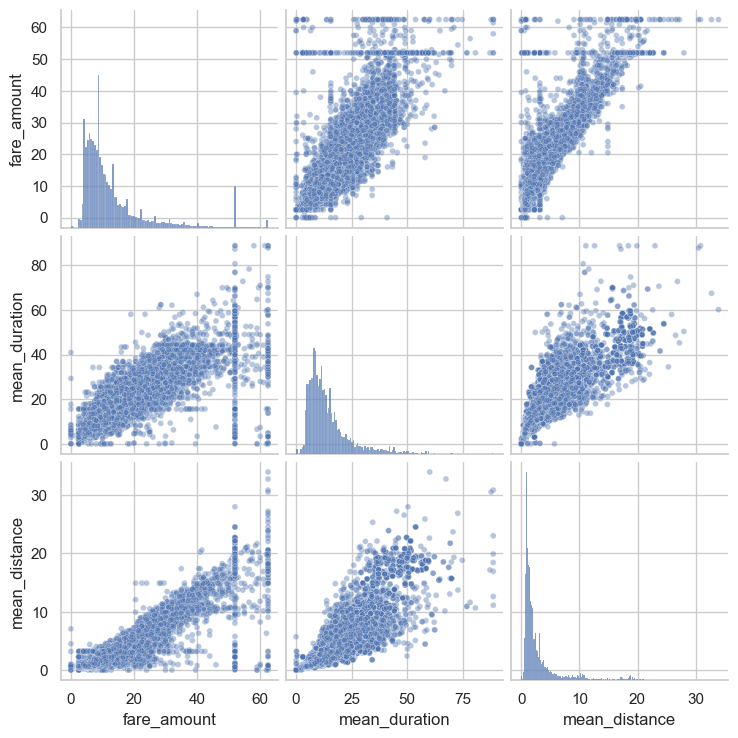

In [125]:
sns.pairplot(df2[['fare_amount','mean_duration','mean_distance']], plot_kws={'alpha':0.4,'size':5})

#### Identify correlations

In [126]:
correlation = df2.corr(method='pearson')
correlation

,VendorID,passenger_count,fare_amount,mean_distance,mean_duration,rush_hour
VendorID,1.000000,0.266463,0.001045,0.004741,0.001876,-0.002874
passenger_count,0.266463,1.000000,0.014942,0.013428,0.015852,-0.022035
fare_amount,0.001045,0.014942,1.000000,0.910185,0.859105,-0.020075
mean_distance,0.004741,0.013428,0.910185,1.000000,0.874864,-0.039725
mean_duration,0.001876,0.015852,0.859105,0.874864,1.000000,-0.021583
rush_hour,-0.002874,-0.022035,-0.020075,-0.039725,-0.021583,1.000000


#### Heatmap

<Axes: >

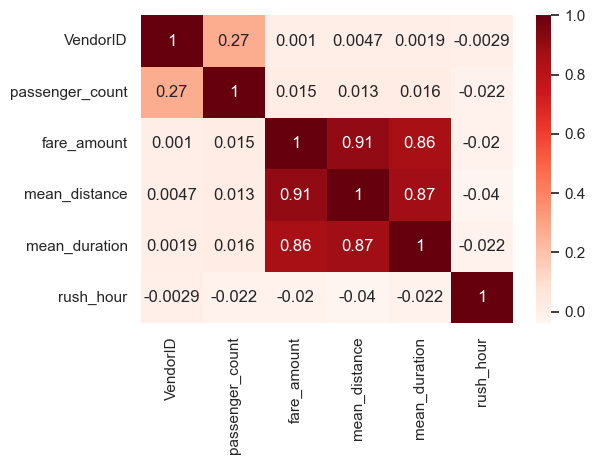

In [127]:
plt.figure(figsize=(6,4))
sns.heatmap(correlation, annot=True, cmap='Reds')

**Note:** mean_duration and mean_distance are highly correlated with fare_amount having a correlation score of 0.86 and 0.91 respectively.

#### Model construction

In [140]:
# Assign the features
X = df2.drop(columns=['fare_amount'])

# Assign the target variable
y = df2[['fare_amount']]

In [141]:
# Dummy encode categorical variables
X['VendorID'] = X['VendorID'].astype(str)

# Get dummies
X = pd.get_dummies(X,drop_first=True, dtype=int)

X.head()

,passenger_count,mean_distance,mean_duration,rush_hour,VendorID_2
0,6,3.521667,22.847222,0,1
1,1,3.108889,24.470370,0,0
2,1,0.881429,7.250000,1,0
3,1,3.700000,30.250000,0,1
4,1,4.435000,14.616667,0,1


In [142]:
# Create a train and test split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2, random_state = 0)

#### Standardize the data
To put all the data in the same scale

In [144]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[-0.50301524,  0.8694684 ,  0.17616665, -0.64893329,  0.89286563],
       [-0.50301524, -0.60011281, -0.69829589,  1.54099045,  0.89286563],
       [ 0.27331093, -0.47829156, -0.57301906, -0.64893329, -1.11998936],
       ...,
       [-0.50301524, -0.45121122, -0.6788917 , -0.64893329, -1.11998936],
       [-0.50301524, -0.58944763, -0.85743597,  1.54099045, -1.11998936],
       [ 1.82596329,  0.83673851,  1.13212101, -0.64893329,  0.89286563]])

#### Fit the model

In [148]:
lr = LinearRegression()
model = lr.fit(X_train_scaled, y_train)

#### Model evaluation

In [156]:
r_sq = lr.score(X_train_scaled, y_train)
print('Coefficient of determination:', r_sq)
y_pred_train = lr.predict(X_train_scaled)
print('R^2:', r2_score(y_train, y_pred_train))
print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:',np.sqrt(mean_squared_error(y_train, y_pred_train)))

Coefficient of determination: 0.8398434585044773
R^2: 0.8398434585044773
MAE: 2.186666416775414
MSE: 17.88973296349268
RMSE: 4.229625629236313


#### Test Data

In [157]:
# Standardize the test data
X_test_scaled = scaler.transform(X_test)

In [159]:
y_pred_test = lr.predict(X_test_scaled)
print('R^2:', r2_score(y_test, y_pred_test))
print('MAE:', mean_absolute_error(y_test,y_pred_test))
print('MSE:', mean_squared_error(y_test, y_pred_test))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred_test)))

R^2: 0.8682583641795454
MAE: 2.1336549840593864
MSE: 14.326454156998945
RMSE: 3.785030271609323


**Note:** Since the R square score is high ast 0.87 and the mean absolute error, mean squared error and root mean squared error are very low we can conclude that there is no bias to this model and it did not overfit. 

#### Results

In [166]:
# Lets create a results dataframe
results = pd.DataFrame(data={'actual': y_test['fare_amount'],
                             'predicted' : y_pred_test.ravel()})
results['residual'] = results['actual'] - results['predicted']

results.head()

,actual,predicted,residual
5818,14.0,12.356503,1.643497
18134,28.0,16.314595,11.685405
4655,5.5,6.726789,-1.226789
7378,15.5,16.227206,-0.727206
13914,9.5,10.536408,-1.036408


#### Visualize

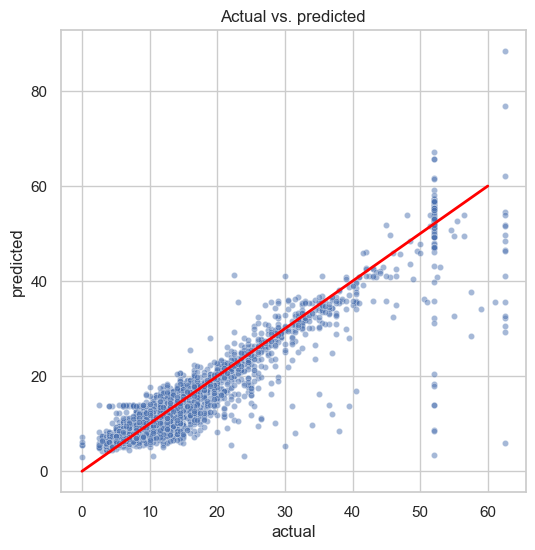

In [173]:
# Scatterplot
fig, ax = plt.subplots(figsize=(6, 6))
sns.set(style='whitegrid')
sns.scatterplot(x = 'actual', y = 'predicted', data=results, s=20, alpha = 0.5, ax = ax)

plt.plot([0,60], [0,60], c='red', linewidth=2)
plt.title('Actual vs. predicted');

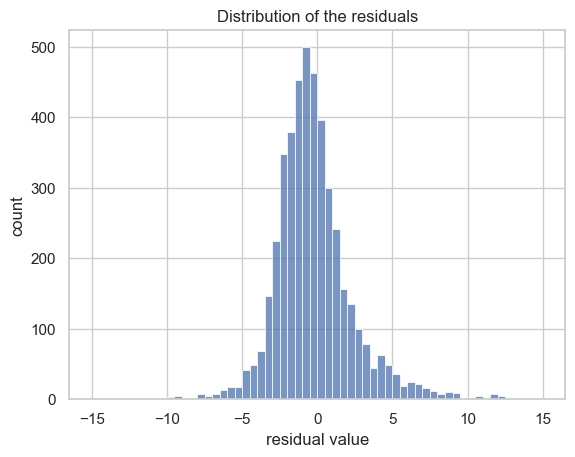

In [174]:
# Visualize the distribution of the `residuals`
sns.histplot(results['residual'], bins=np.arange(-15,15.5,0.5))
plt.title('Distribution of the residuals')
plt.xlabel('residual value')
plt.ylabel('count');

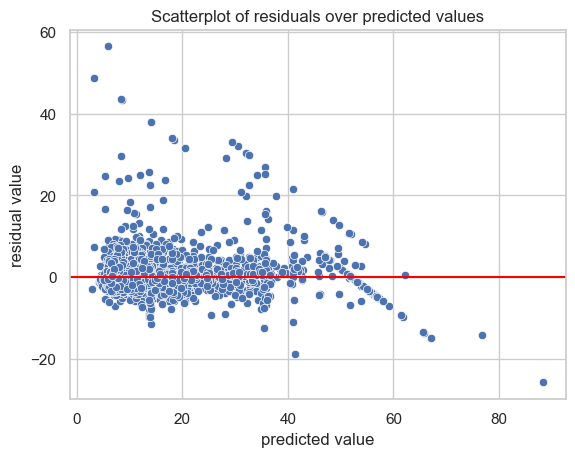

In [175]:
# Create a scatterplot of `residuals` over `predicted`

sns.scatterplot(x='predicted', y='residual', data=results)
plt.axhline(0, c='red')
plt.title('Scatterplot of residuals over predicted values')
plt.xlabel('predicted value')
plt.ylabel('residual value')
plt.show()

#### Predict on full dataset

In [176]:
X_scaled = scaler.transform(X)
y_preds_full = lr.predict(X_scaled)

#### Impute ratecode to fare

The data dictionary says that the `RatecodeID` column captures the following information:

1 = standard rate  
2 = JFK (airport)  
3 = Newark (airport)  
4 = Nassau or Westchester  
5 = Negotiated fare  
6 = Group ride  

This means that some fares don't need to be predicted. They can simply be imputed based on their rate code. Specifically, all rate codes of `2` can be imputed with $52, as this is a flat rate for JFK airport.

In [188]:
final_preds = df[['RatecodeID']].copy()

final_preds['y_preds_full'] = y_preds_full

final_preds.loc[final_preds['RatecodeID']==2,'y_preds_full'] = 52

final_preds[final_preds['RatecodeID']==2].head()

,RatecodeID,y_preds_full
11,2,52.0
110,2,52.0
161,2,52.0
247,2,52.0
379,2,52.0


#### Check performance on full dataset

In [189]:
final_preds = final_preds['y_preds_full']

In [191]:
print('R^2:', r2_score(y, final_preds))
print('MAE:', mean_absolute_error(y, final_preds))
print('MSE:', mean_squared_error(y, final_preds))
print('RMSE:',np.sqrt(mean_squared_error(y, final_preds)))

R^2: 0.8910853978683975
MAE: 1.992506252269974
MSE: 12.101575504689935
RMSE: 3.4787318816905013


#### Save final predictions with mean_duration and mean_distance columns

In [193]:
nyc_preds_means = df[['mean_duration','mean_distance']].copy()
nyc_preds_means['predicted_fare'] = final_preds

nyc_preds_means.head(10)

,mean_duration,mean_distance,predicted_fare
0,22.847222,3.521667,16.434245
1,24.470370,3.108889,16.052218
2,7.250000,0.881429,7.053706
3,30.250000,3.700000,18.731650
4,14.616667,4.435000,15.845642
5,11.855376,2.052258,10.441351
6,59.633333,12.830000,45.374542
7,26.437500,4.022500,18.555128
8,7.873457,1.019259,7.151511
9,10.541111,1.580000,9.122755


In [194]:
# Save the data in to csv
nyc_preds_means.to_csv('nyc_taxi_data_fare_prediction.csv', index=False)